In [1]:
import numpy as np
import matplotlib.pyplot as plt
def sinew(f,osr,phase,n):
    fs=osr*f
    t=np.arange(0,(n*1/f)-1/fs,1/fs)
    g=np.sin((2*np.pi*f*t)+phase)
    y=np.sign(g)
    return (t,g,y)

Text(0, 0.5, 'amplitude')

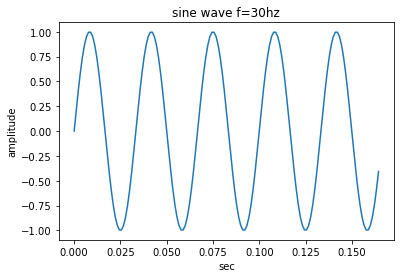

In [7]:
f=30
osr=30
phase=0
n=5
(t,g,y)=sinew(f,osr,phase,n)
plt.plot(t,g)
plt.title('sine wave f='+str(f)+'hz')
plt.xlabel('sec')
plt.ylabel('amplitude')

Text(0, 0.5, 'amplitude')

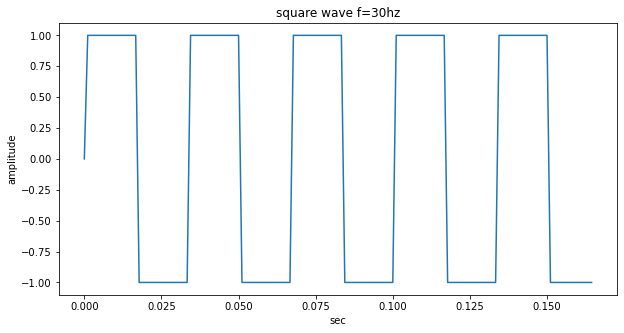

In [81]:
plt.plot(t,y)
plt.title('square wave f='+str(f)+'hz')
plt.xlabel('sec')
plt.ylabel('amplitude')

In [82]:
def rectpulse(a,fs,T):
    t=np.arange(-0.5,0.5,1/fs)
    r=((t>=-T/2)*(t<=T/2))+(0.5*(t==T/2))+(0.5*(t==-T/2))
    g=a*r
    return (t,g)

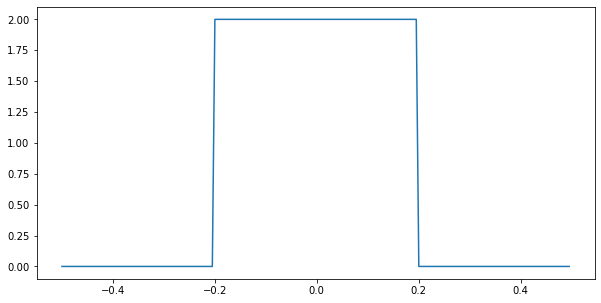

In [83]:
a=2
fs=200
T=0.4
(t,g)=rectpulse(a,fs,T)
plt.plot(t,g)

In [94]:
from scipy.fftpack import fft,ifft,fftshift,ifftshift 

Text(45.0, 0.5, '|X[f]|')

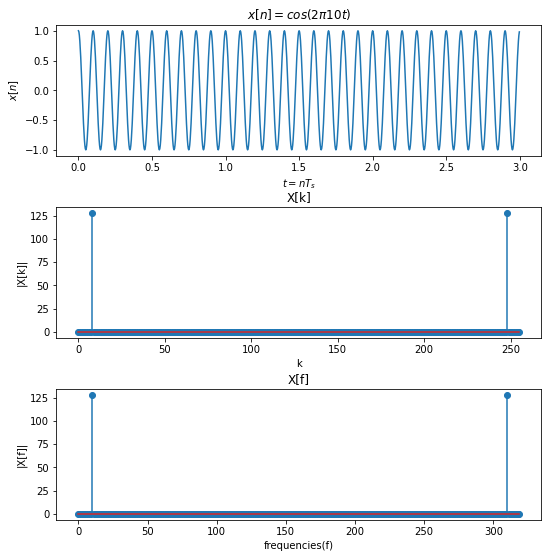

In [91]:
np.set_printoptions(formatter={"float_kind":lambda x:"%g" % x})
fc=10
fs=32*fc
t=np.arange(0,3,1/fs)
x=np.cos(2*np.pi*fc*t)
fig, (ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(8,8))
fig.tight_layout(pad=3)
ax1.plot(t,x)
ax1.set_title('$x[n]=cos(2\pi 10 t)$')
ax1.set_xlabel('$t=nT_s$')
ax1.set_ylabel('$x[n]$')
N=256
X=fft(x,N)
df=fs/N
sampleIndex=np.arange(0,N)
f=sampleIndex*df
ax2.stem(sampleIndex,abs(X),use_line_collection=True)
ax2.set_title('X[k]')
ax2.set_xlabel('k')
ax2.set_ylabel('|X[k]|')
ax3.stem(f,abs(X),use_line_collection=True)
ax3.set_title('X[f]')
ax3.set_xlabel('frequencies(f)')
ax3.set_ylabel('|X[f]|')

C:\Users\user\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, '|X[n]|')

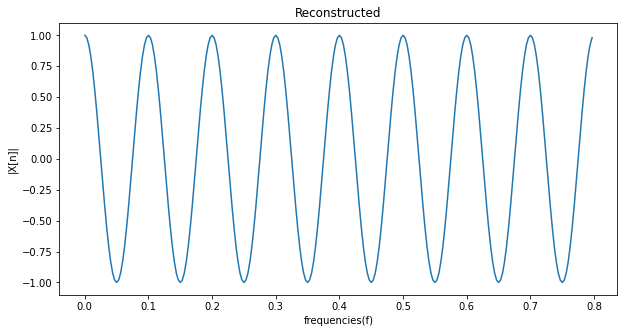

In [86]:
Y=ifft(X,N)
t1=np.arange(0,len(X))/fs
plt.plot(t1,Y)
plt.title('Reconstructed')
plt.xlabel('frequencies(f)')
plt.ylabel('|X[n]|')

C:\Users\user\AppData\Local\Temp\ipykernel_12744\2279798723.py:9: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax1.stem(sampleIndex,abs(X2),'r',use_line_collection=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12744\2279798723.py:13: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax2.stem(f,abs(X2),'r' , use_line_collection=True)


(Text(0.5, 24.000000000000043, 'frequencies (f)'), Text(63.0, 0.5, '|X(f)|'))

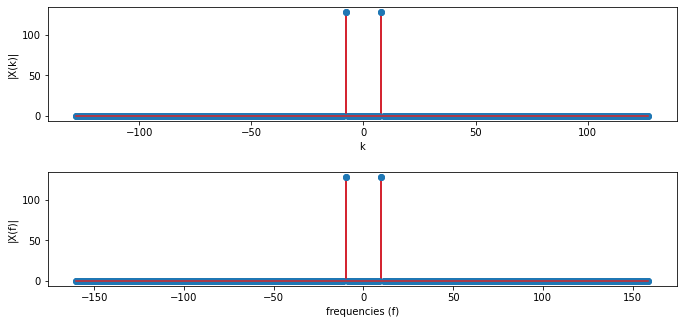

In [87]:
sampleIndex=np.arange(-N//2,N//2)
X1=X[sampleIndex]
X2=fftshift(X)
df=fs/N
f=sampleIndex*df
fig, (ax1,ax2)=plt.subplots(nrows=2,ncols=1)
fig.tight_layout(pad=3)
ax1.stem(sampleIndex,abs(X1), use_line_collection=True)
ax1.stem(sampleIndex,abs(X2),'r',use_line_collection=True)
ax1.set_xlabel('k')
ax1.set_ylabel('|X(k)|')
ax2.stem(f,abs(X1), use_line_collection=True)
ax2.stem(f,abs(X2),'r' , use_line_collection=True)
ax2.set_xlabel('frequencies (f)'),ax2.set_ylabel('|X(f)|')

Text(0.5, 50.99999999999994, 'f(Hz)')

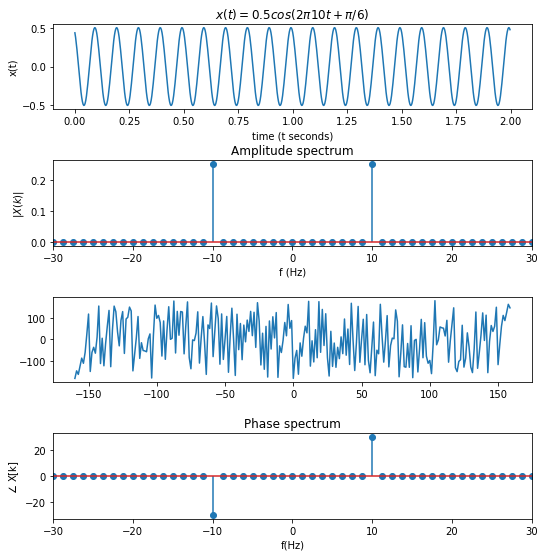

In [92]:
A = 0.5
fc=10
phase=30
fs=32*fc
t=np.arange(start = 0,stop = 2,step = 1/fs)
phi = phase*np.pi/180; 
x=A*np.cos(2*np.pi*fc*t+phi) 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,figsize=(8,8))
fig.tight_layout(pad=3)
ax1.plot(t,x) 
ax1.set_title(r'$x(t) = 0.5 cos (2 \pi 10 t + \pi/6)$')
ax1.set_xlabel('time (t seconds)');
ax1.set_ylabel('x(t)')
N=256
X = 1/N*fftshift(fft(x,N))
df=fs/N # frequency resolution
sampleIndex = np.arange(start = -N//2,stop = N//2) 
f=sampleIndex*df
ax2.stem(f,abs(X), use_line_collection=True) 
ax2.set_xlim(-30, 30)
ax2.set_title('Amplitude spectrum')
ax2.set_xlabel('f (Hz)');
ax2.set_ylabel(r'$ \left| X(k) \right|$')
phase=np.arctan2(np.imag(X),np.real(X))*180/np.pi 
ax3.plot(f,phase) 
X2=X 
threshold = max(abs(X))/10000;
X2[abs(X)<threshold]=0 
phase=np.arctan2(np.imag(X2),np.real(X2))*180/np.pi 
ax4.stem(f,phase, use_line_collection=True) 
ax4.set_xlim(-30, 30)
ax4.set_title('Phase spectrum')
ax4.set_ylabel(r"$\angle$ X[k]")
ax4.set_xlabel('f(Hz)')

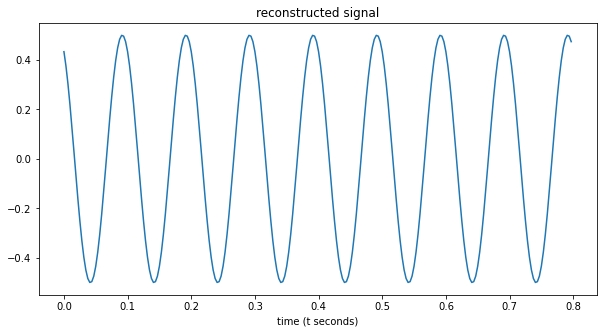

In [95]:
x_recon = N*ifft(ifftshift(X),N) # reconstructed signal
t = np.arange(start = 0,stop = len(x_recon))/fs # recompute time index
plt.plot(t,np.real(x_recon)) # reconstructed signal
plt.title('reconstructed signal')
plt.xlabel('time (t seconds)');ax1.set_ylabel('x(t)');